In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [3]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Set up the URL.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# setting up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_Speed = []
city_number = 0

# Looping through the list of cities and requesting for data on each
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    #city_number+= city_number
    try:
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"Processing Record {len(City)} of Set 1 | {city}")
    except KeyError:
        print("City not found. Skipping...")
        pass
    
   




Beginning Data Retrieval 
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | jamestown
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | cap malheureux
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 12 of Set 1 | souillac
City not found. Skipping...
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | nogent-le-rotrou
Processing Record 19 of Set 1 | progreso
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of

Processing Record 184 of Set 1 | grindavik
Processing Record 185 of Set 1 | nanortalik
Processing Record 186 of Set 1 | beringovskiy
Processing Record 187 of Set 1 | tezu
Processing Record 188 of Set 1 | cherskiy
Processing Record 189 of Set 1 | la paz
City not found. Skipping...
Processing Record 190 of Set 1 | saint anthony
Processing Record 191 of Set 1 | te anau
Processing Record 192 of Set 1 | nuuk
Processing Record 193 of Set 1 | el paso
Processing Record 194 of Set 1 | balabac
Processing Record 195 of Set 1 | mount isa
Processing Record 196 of Set 1 | athabasca
Processing Record 197 of Set 1 | port hedland
City not found. Skipping...
Processing Record 198 of Set 1 | esperance
Processing Record 199 of Set 1 | fairbanks
City not found. Skipping...
Processing Record 200 of Set 1 | bathsheba
Processing Record 201 of Set 1 | sao joao da barra
Processing Record 202 of Set 1 | wawa
Processing Record 203 of Set 1 | salalah
City not found. Skipping...
Processing Record 204 of Set 1 | wai

Processing Record 366 of Set 1 | fomboni
Processing Record 367 of Set 1 | roebourne
Processing Record 368 of Set 1 | amudat
Processing Record 369 of Set 1 | zatoka
Processing Record 370 of Set 1 | jumla
Processing Record 371 of Set 1 | bandarbeyla
Processing Record 372 of Set 1 | sumbe
Processing Record 373 of Set 1 | uruzgan
Processing Record 374 of Set 1 | kiama
Processing Record 375 of Set 1 | opuwo
Processing Record 376 of Set 1 | palmer
Processing Record 377 of Set 1 | pacific grove
City not found. Skipping...
Processing Record 378 of Set 1 | geraldton
Processing Record 379 of Set 1 | erzin
Processing Record 380 of Set 1 | ilulissat
Processing Record 381 of Set 1 | santa rosa
Processing Record 382 of Set 1 | kushima
Processing Record 383 of Set 1 | pangnirtung
Processing Record 384 of Set 1 | warrnambool
Processing Record 385 of Set 1 | cranbourne
Processing Record 386 of Set 1 | copala
Processing Record 387 of Set 1 | sai buri
Processing Record 388 of Set 1 | jacareacanga
Process

In [4]:
#Export the city data into a .csv.
#Display the DataFrame

weather_data = pd.DataFrame({"City":City,"Cloudiness":Cloudiness,"Country":Country,"Date":Date,
                             "Humidity":Humidity,"Latitude":Lat,"Longitude":Lng,"Max Temperature":Max_temp,"Wind Speed":Wind_Speed})

weather_data.to_csv("output_data_file", index=False, header=True)

weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Rikitea,80,PF,1583711819,85,-23.12,-134.97,78.89,16.75
1,Ushuaia,75,AR,1583711820,76,-54.80,-68.30,48.20,26.40
2,Clyde River,90,CA,1583711821,74,70.47,-68.59,-22.00,27.51
3,Albany,1,US,1583711822,36,42.60,-73.97,50.00,3.36
4,Punta Arenas,40,CL,1583711823,71,-53.15,-70.92,51.80,23.04
...,...,...,...,...,...,...,...,...,...
533,Agde,98,FR,1583712473,87,43.31,3.48,55.00,11.41
534,Bershet',75,RU,1583712474,98,57.73,56.38,32.00,13.42
535,Hofn,0,IS,1583712475,64,64.25,-15.21,29.57,14.99
536,Diamantino,61,BR,1583712477,66,-14.41,-56.45,75.18,1.41


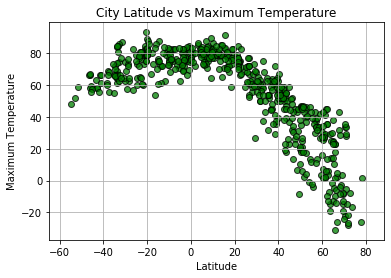

In [5]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot
x_axis = weather_data["Latitude"]
y_axis = weather_data["Max Temperature"]
plt.xlim((weather_data["Latitude"]).min()-10,(weather_data["Latitude"]).max()+10)
plt.grid()
plt.title("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.scatter(x_axis,y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.75)

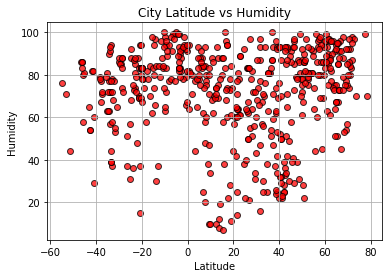

In [6]:
#Latitude vs. Humidity Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Humidity"]
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis,y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

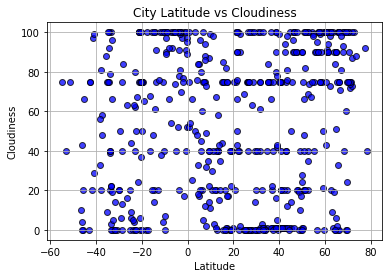

In [7]:
#Latitude vs. Cloudiness Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Cloudiness"]
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

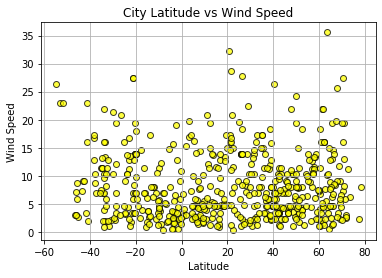

In [8]:
#Latitude vs. Wind Speed Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Wind Speed"]
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_axis,y_axis, marker="o", facecolors="yellow", edgecolors="black",alpha=0.75)

The r-squared is: -0.8826613878383205


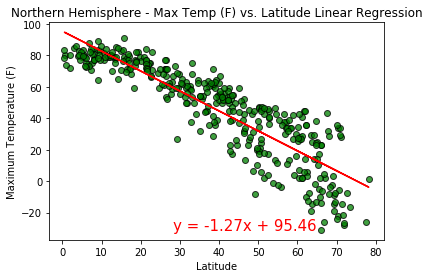

In [15]:
# Creating a function to create Linear Regression plots


def linear_regression(x_values,y_values,color):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    print(f"The r-squared is: {rvalue}")
    regress_value = x_values*slope + intercept
    plt.scatter(x_values,y_values, marker="o", facecolors=color, edgecolors="black",alpha=0.75)
    plt.plot(x_values,regress_value,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_values.max()-50,y_values.min()),fontsize=15,color='red')

# Creating Northern and Southern Hemisphere DataFrames    

#Northern Hemishere DataFrame
Data_north = weather_data.loc[weather_data["Latitude"]>0,:]

#Southern Hemishere DataFrame
Data_south = weather_data.loc[weather_data["Latitude"]<0,:]


#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
linear_regression(Data_north["Latitude"],Data_north["Max Temperature"],"green")

The r-squared is: 0.5293632395123602


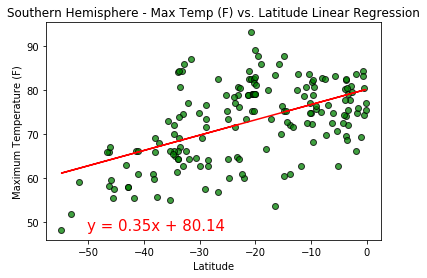

In [16]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression


plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
linear_regression(Data_south["Latitude"],Data_south["Max Temperature"],"green")

The r-squared is: 0.25989643531461587


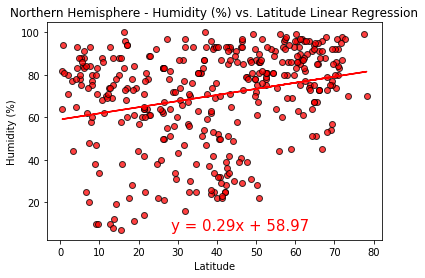

In [17]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_north["Latitude"],Data_north["Humidity"],"red")

The r-squared is: 0.3776407292392829


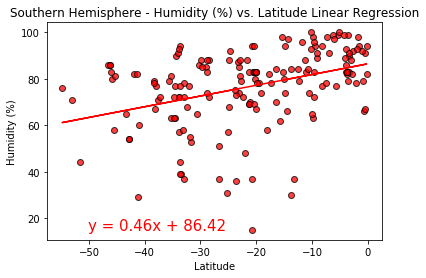

In [18]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_south["Latitude"],Data_south["Humidity"],"red")

The r-squared is: 0.2460266532155232


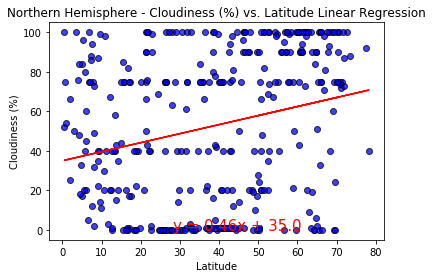

In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
linear_regression(Data_north["Latitude"],Data_north["Cloudiness"],"blue")

The r-squared is: 0.3941242238351369


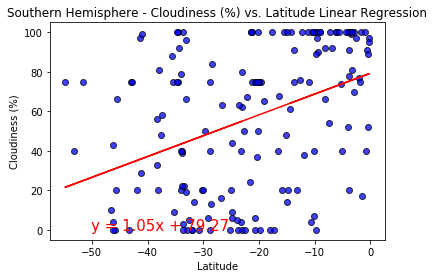

In [20]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_regression(Data_south["Latitude"],Data_south["Cloudiness"],"blue")

The r-squared is: 0.03968434312905149


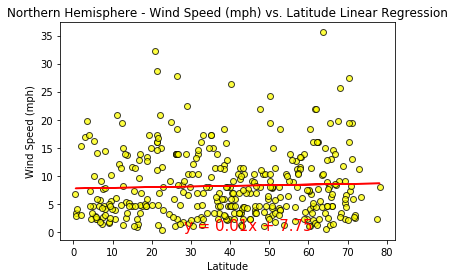

In [21]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_regression(Data_north["Latitude"],Data_north["Wind Speed"],"Yellow")

The r-squared is: -0.3326586537589765


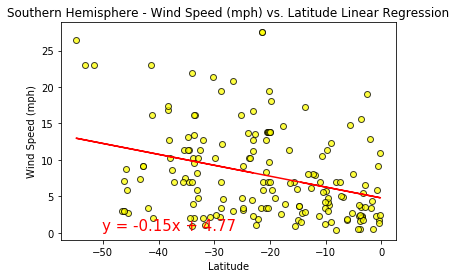

In [22]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_regression(Data_south["Latitude"],Data_south["Wind Speed"],"Yellow")